<a href="https://colab.research.google.com/github/amansinghal2/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Aman_Singhal_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import the libraries that will be used.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import data by mounting the google drive.
from google.colab import drive
drive.mount('/content/drive')

airbnb_dataset = pd.read_csv('/content/drive/MyDrive/Airbnb booking Analysis./Airbnb NYC 2019.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First look at our data.
# First five rows.
airbnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Last five rows.
airbnb_dataset.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**The Dataframe contains both numerical and categorical features, but the question is how many are numerical or categorical in their respective number of rows and columns.**

Let's check it out.

*Let's check out the shape of our data.*



In [ ]:
# Check the shape of our data.
airbnb_dataset.shape

(48895, 16)

**Drop any unwanted columns.**

we drop **Name & host_name** as its a matter of one's privacy & could expose them.

I dropped **host_id** because I didn't find it relevant.

In [ ]:
# Drop unwanted columns.
airbnb_dataset.drop(['name', 'host_id',	'host_name'], inplace=True, axis=1)

find out our data shape

In [ ]:
# Find out our data shape.
airbnb_dataset.shape

(48895, 13)

In [ ]:
# Lets get some info regarding this data.
airbnb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                


Check whether our dataset has null values or not.

In [ ]:
# Check for null values.
airbnb_dataset.isnull().sum()

id                                    0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


From the above observation, we can see that:
* There are **48895 rows** and **13 columns.**
* There are **9 numerical features** and **4 categorical features.**
* There are few columns with **null values** which need to be dropped.






In [ ]:
# Droping the null values.
airbnb_dataset.dropna(inplace=True)

In [ ]:
# Recheck the shape.
airbnb_dataset.shape

(38843, 13)

In [ ]:
airbnb_dataset.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

we have dropped all the null values from our dataset.

In [ ]:
# Describe our data.
airbnb_dataset.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



The table above shows that the minimum_nights stayed is 1 and the minimum price paid is 0$, which is impossible unless Airbnb plans to provide rooms free of cost.

Which indirectly means that there exist few rows in which the value for minimum_nights is 1 and the respective rent (price) paid is 0.

In order to solve this we will have to replace these rows with the average of the minimum prices paid for 1 night multiplied by the total nights stayed, i.e. [price = avg(min_prices)x(total_nights_stayed)]. Therefore lets assume that the minimum prices to be paid for 1 night ranges between (0-100) and get an average of all the prices less than 100$.

In [ ]:
# Lets make a copy of our dataset before making any changes.
airbnb_dataset_copy = airbnb_dataset.copy()

In [ ]:
# Take a look at the price.
airbnb_dataset_copy['price'].describe()

count    38843.000000
mean       142.317947
std        196.945624
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# First get the columns with price = 0.
airbnb_dataset[airbnb_dataset_copy['price']==0]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [ ]:
# Second get the average of minimum prices paid.
min_avg_price = round(airbnb_dataset_copy.loc[airbnb_dataset_copy['price'] < 100, 'price'].mean())
min_avg_price

65

In [ ]:
# Third replace the price = 0 with min_avg_price.
airbnb_dataset_copy['price'] = np.where((airbnb_dataset_copy['price'] == 0),
                                     (min_avg_price*airbnb_dataset_copy['minimum_nights']),
                                     airbnb_dataset_copy['price'])

In [ ]:
# Finally check if the prices have been replaced or not.
airbnb_dataset_copy[airbnb_dataset_copy['price']==0]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


double check the prices

In [ ]:
# Check price again.
airbnb_dataset_copy['price'].describe()

count    38843.000000
mean       142.448472
std        197.363353
min         10.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

now there are no rows with price 0$

In [ ]:
airbnb_dataset_copy.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,40.728134,-73.951148,142.448472,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,0.054990,0.046695,197.363353,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


  # ***Exploratory Data Analysis:[EDA]***



In [ ]:
# numeric and categorical features.

numeric_features = airbnb_dataset_copy.describe().columns

categorical_fetures = airbnb_dataset_copy.describe(exclude=[int, float]).columns

print('Numeric Features:',list(numeric_features))

print('Categorical Features:',list(categorical_fetures))



Numeric Features: ['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical Features: ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


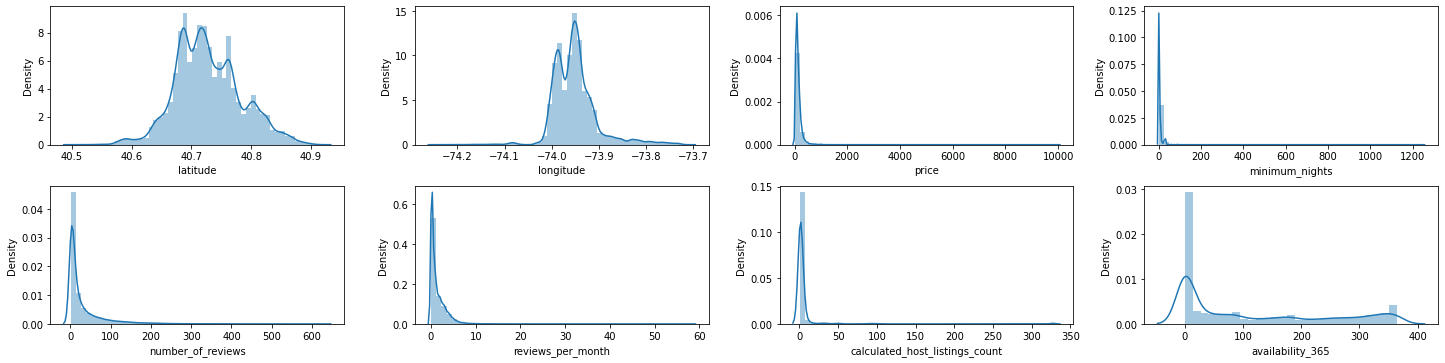

In [ ]:
# numeric_features to understand their distributions.

names = numeric_features.values[1:]  #exclude id.
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.distplot(airbnb_dataset_copy[name], ax=ax)
    
plt.show()

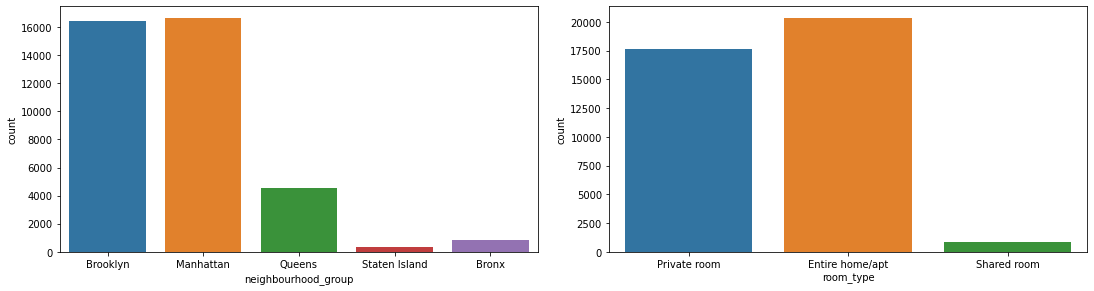

In [ ]:
# Checkout few categorical features. (exclude 'last_review', 'neighbourhood' as these type of data contain high cardinality)

names = categorical_fetures.values[0:3:2]
ncols = 2
fig, axes = plt.subplots(1,ncols, figsize=(15,4))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.countplot(airbnb_dataset_copy[name], ax=ax)
    
plt.show()

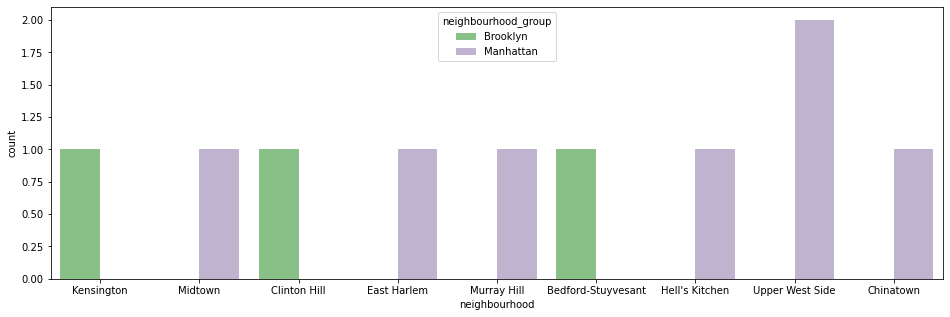

In [ ]:
# Check the top 10 neighbourhoods.
fig = plt.figure(figsize=(16,5))
sns.countplot(data=airbnb_dataset_copy[:10], x='neighbourhood', hue='neighbourhood_group', palette='Accent')
plt.show()

One hot Encoding

In [ ]:
# one-hot-encoding done for the above two categorical features.
airbnb_dataset_with_dummies = pd.get_dummies(airbnb_dataset_copy, columns=['neighbourhood_group', 'room_type'])

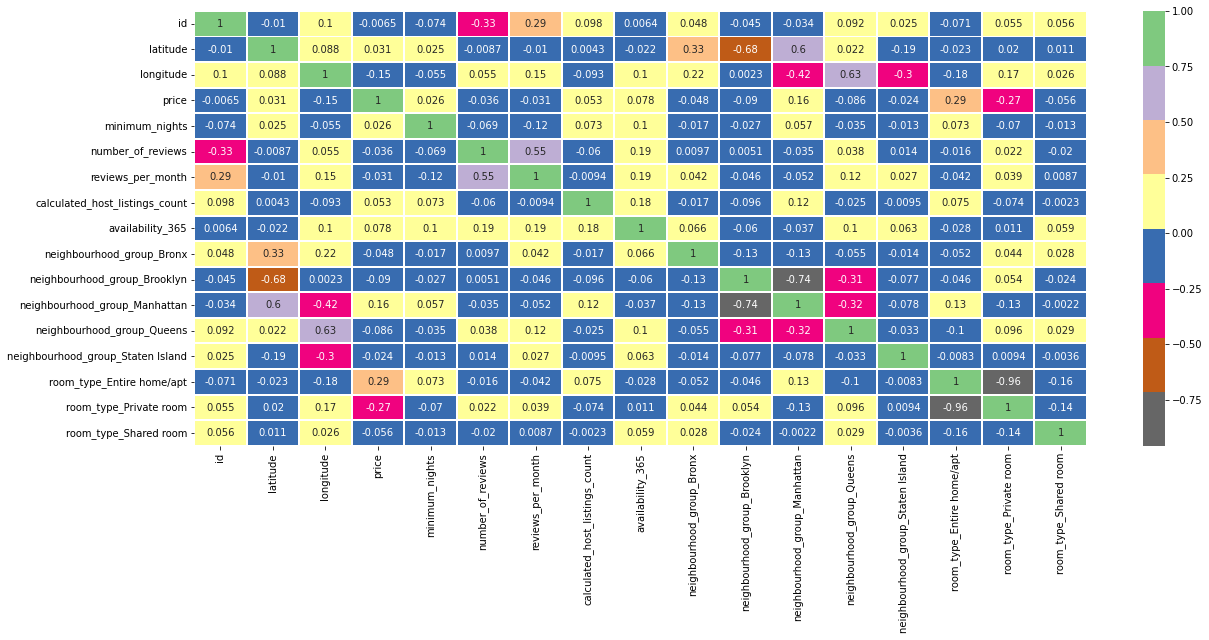

In [ ]:
# check for multicolinearity.
correlation = airbnb_dataset_with_dummies.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, linewidths=1, cmap='Accent_r')
plt.show()

**check for outliers**

In [ ]:
# Create a dataset copy for the numeric_features.
boxplot_data = airbnb_dataset_copy[numeric_features[1:]]

we use boxplots for an easy understanding of outliers

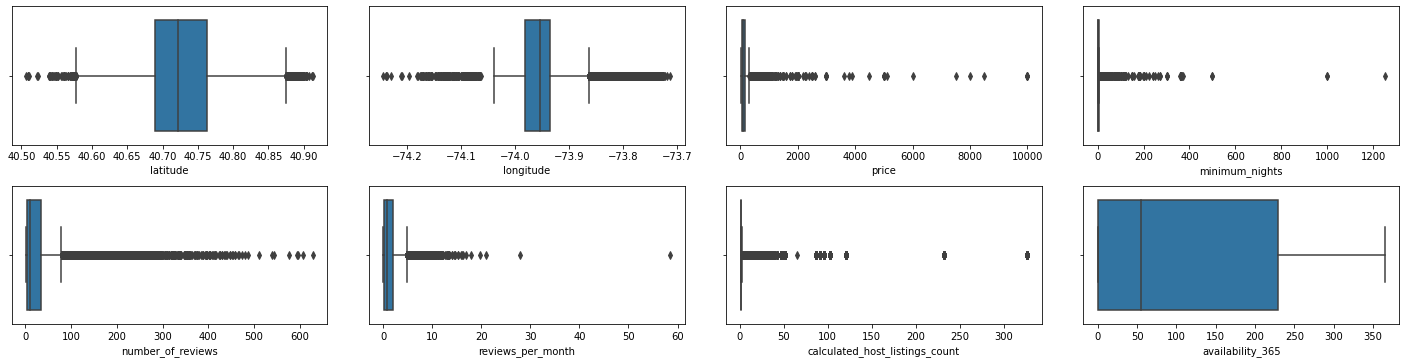

In [ ]:
# Plot boxplots to find outliers distribution.
names = boxplot_data.columns
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name, data=boxplot_data, ax=ax)
    
plt.show()

what do these charts & drawings state us.

1. Distributions and skewness of our numeric_features:
> From the distplots it can be noticed that most of the numeric_features are positively skewed, where in fact latitude & longitude data seem somewhat normally distributed. This signifies that these features have to be transformed inorder to remove the skewness.

.
2. Most favoured neighbourhood_group & room type.
> Barplots for the categorical_features (neighbourhood_group & room type) show that ultimate preferd neighbourhood_groups are **Brooklyn** and **Manhatan** inasmuch as ultimate prefered room_type are either a **Private range** or an **Complete Home/Suitable**.

.
3. Correlation between the variables.
```
number_of_reviews is highly correlated with reviews_per_month
latitude and longitude are highly correlated with different neighbourhood_groups


.
4. Outliers!!
> The boxplots indicate that the features contain mild as well as extreme outliers present which can be treated either using the IQR or the Z-score.

Now that we have achieved the elementary exploaration for our data.

# **What can we determine about various hosts & areas?**

*Lets visualize that of these areas have maximal number of hosts present and what somewhat rooms are most favorite.*

In [ ]:
# Groupby the different id's w.r.t neighbourhood_groups.

hosts_and_areas_df = airbnb_dataset.groupby(['neighbourhood_group'],
                                         as_index=False)['id'].count().sort_values(['id'],
                                          ascending=False).rename(columns={'neighbourhood_group':'location', 'id':'hosts_count'})

In [ ]:
hosts_and_areas_df

,location,hosts_count
2,Manhattan,16632
1,Brooklyn,16447
3,Queens,4574
0,Bronx,876
4,Staten Island,314


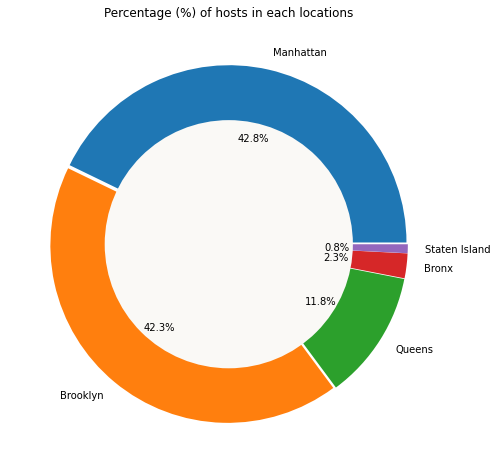

In [ ]:
# Lets plot it for better understanding.
fig = plt.figure(figsize=(7,7))
plt.title('Percentage (%) of hosts in each locations')

plt.pie(data=hosts_and_areas_df, x='hosts_count', labels='location', explode=(0.01,0.01,0.01,0.01,0.01),autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='#FAF9F6')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

It would-be clear to mention that majority of the hosts are concern the locales Manhatan and Brooklyn, hence making these great standard destinations.

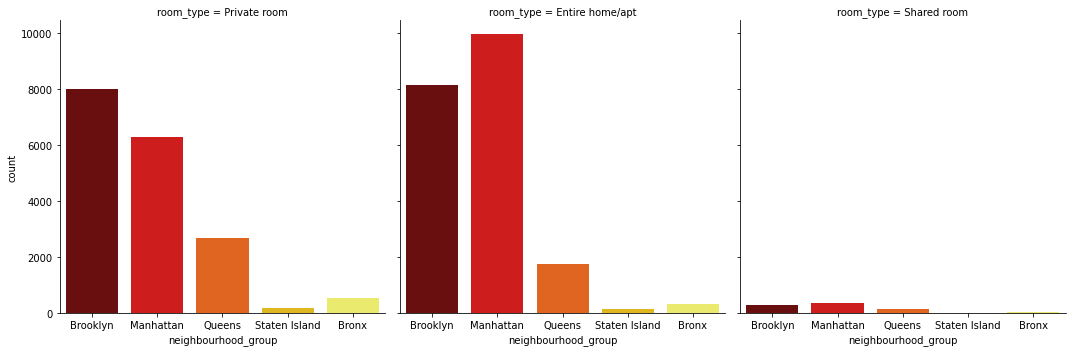

In [ ]:
# Check which room_types are more popular in these areas.
room_type_and_areas = sns.catplot(data=airbnb_dataset,x='neighbourhood_group',kind='count',col='room_type', palette='hot')

# *Majority hosts in the Manhatan and Brooklyn afford either a Private room or Full home/apt. If folk are expect future buissness in these areas Private room or Full home/apt hopeful the best choice.*